In [1]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [0,1,2,3]]
y = iris.target

# Gini Impurity

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=i+1, random_state=0)
    tree.fit(X_train, y_train)

    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
    
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.33333333333333337 0.33333333333333337
2 0.053333333333333344 0.040000000000000036
3 0.053333333333333344 0.040000000000000036
4 0.040000000000000036 0.013333333333333308
5 0.013333333333333308 0.040000000000000036
6 0.0 0.026666666666666616
7 0.0 0.026666666666666616
8 0.0 0.026666666666666616
9 0.0 0.026666666666666616
10 0.0 0.026666666666666616


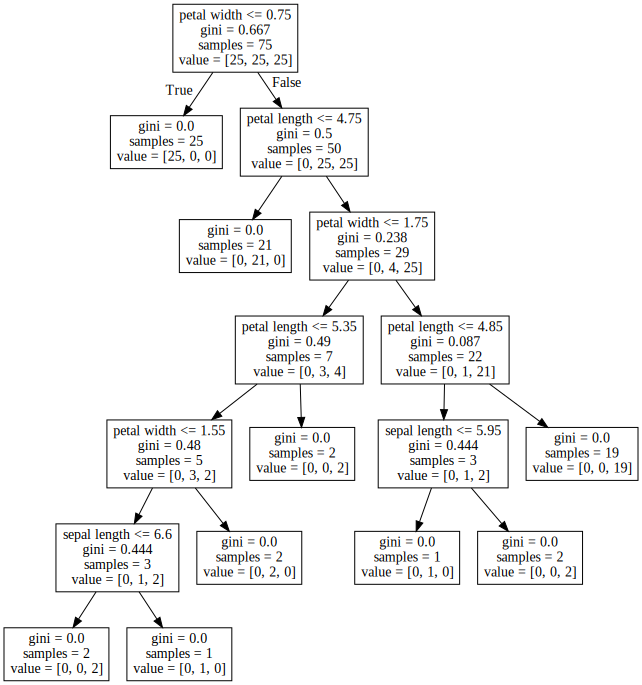

In [4]:
export_graphviz(tree, out_file='iris_gini.dot', feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'])
with open('iris_gini.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

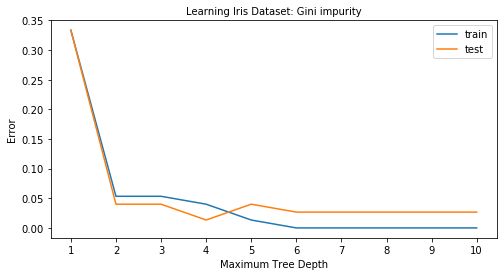

In [5]:
plt.close('all')
fig, ax = plt.subplots(figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset: Gini impurity', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

# Entropy Impurity

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X_train, y_train)

    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
    
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.33333333333333337 0.33333333333333337
2 0.053333333333333344 0.040000000000000036
3 0.053333333333333344 0.040000000000000036
4 0.053333333333333344 0.040000000000000036
5 0.026666666666666616 0.040000000000000036
6 0.013333333333333308 0.026666666666666616
7 0.013333333333333308 0.040000000000000036
8 0.0 0.040000000000000036
9 0.0 0.040000000000000036
10 0.0 0.040000000000000036


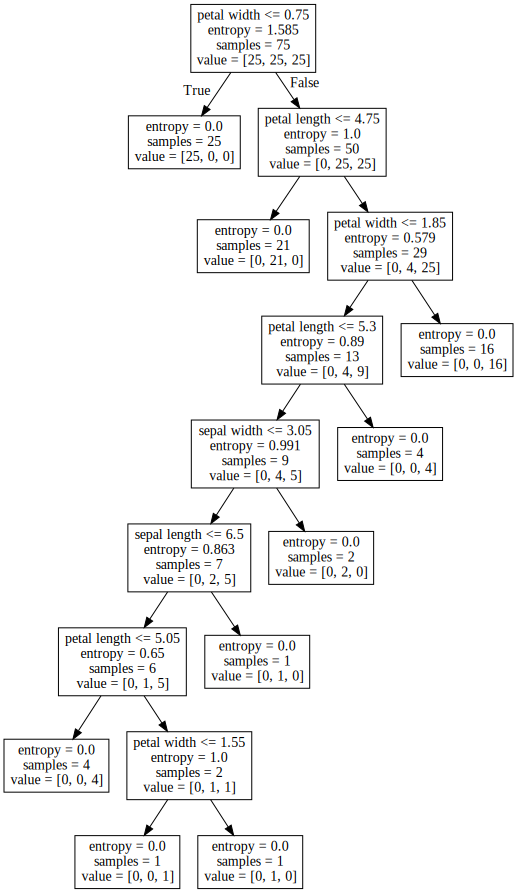

In [7]:
export_graphviz(tree, out_file='iris_entropy.dot', feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'])
with open('iris_entropy.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

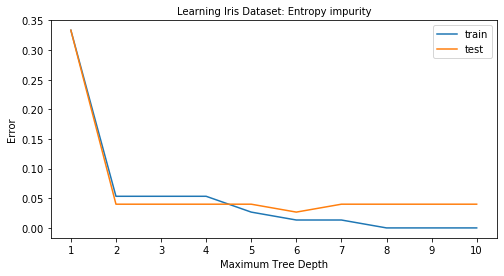

In [8]:
plt.close('all')
fig, ax = plt.subplots(figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset: Entropy impurity', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

# Discussion

In this part of the assignment, we were tasked to use the Decision Tree classifier on the iris data set using all the features and catagories at once. The catagories being virginica, versicolor, and setora and the four features being sepal length, sepal width, petal length, petal width. The classifier was ran 2 times, each time using a different criterion. As seen above, when using gini impurity, the error smooths out after a tree depth of 6 where as when using entropy impurity, the error smooths out after a tree depth of 8. It is also shown that the difference between the error in the training and test datasets is smaller when using gini impurity as opposed to entropy impurity. Overall, using gini impurity will give a more accurate result that converges faster as well.